This Notebooks evaluates the Lossfunctions and the development of the loss during Training

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np


Read CSV-files created during Training process
### The header of the 'loss-files' should be
#### Epoch	| Total Loss |	Physical Loss |	Data Loss |	Test Error Mean |	Test Error Loss Function |	Test Error Loss Function MSE

### The header of the 'test files' should be
#### time |	theta1_actual |	omega1_actual |	theta2_actual |	omega2_actual |	theta1_predicted |	omega1_predicted |	theta2_predicted |	omega2_predicted

In [48]:
# Read CSV files
## The header of the 'loss-files' should be
#Epoch	Total Loss	Physical Loss	Data Loss	Test Error Mean	Test Error Loss Function	Test Error Loss Function MSE

## The header of the 'test files' should be
#time	theta1_actual	omega1_actual	theta2_actual	omega2_actual	theta1_predicted	omega1_predicted	theta2_predicted	omega2_predicted

filename_MSE_loss = 'trainingloss_MSE_conserv_energy_2002'
filename_MAE_loss = 'trainingloss_cycle0_MAE_conserv_energy_2002'
filename_MSE_test = r'C:\Users\lauto\Documents\Import\Studiumsmöglichkeiten\Hochschule Mannheim Maschinenbau\Studienarbeit\codes\Final\Evaluation\lstm-pend2'
filename_MAE_test = 'MAE_lstm-pend2'

MSE_loss = pd.read_csv(f'{filename_MSE_loss}.csv')
MAE_loss = pd.read_csv(f'{filename_MAE_loss}.csv')
MSE_test = pd.read_csv(f'{filename_MSE_test}.csv')
MAE_test = pd.read_csv(f'{filename_MAE_test}.csv')

In [49]:
MAE_loss.head()

,Epoch,Total Loss,Physical Loss,Data Loss,Test Error Mean,Test Error Loss Function,Test Error Loss Function MSE
0,1,0.019434,0.017887,0.017645,0.068440,0.068440,0.005336
1,2,0.019354,0.000359,0.019318,0.075097,0.075097,0.005923
2,3,0.036130,0.219978,0.013935,0.074177,0.074177,0.006427
3,4,0.047211,0.281338,0.018698,0.062748,0.062748,0.004154
4,5,0.023022,0.126205,0.010175,0.071147,0.071147,0.005228


In [50]:
MSE_test.head()

,time,theta1_actual,omega1_actual,theta2_actual,omega2_actual,theta1_predicted,omega1_predicted,theta2_predicted,omega2_predicted
0,0.000000,-0.349066,0.000000,0.610865,0.000000,-0.349066,0.000000,0.610865,0.000000
1,0.033333,-0.347091,0.118553,0.606156,-0.282628,-0.347091,0.118553,0.606156,-0.282628
2,0.066667,-0.341150,0.238166,0.592010,-0.566466,-0.341150,0.238166,0.592010,-0.566466
3,0.100000,-0.331191,0.359832,0.568366,-0.852633,-0.331191,0.359832,0.568366,-0.852633
4,0.133333,-0.317130,0.484374,0.535132,-1.141989,-0.317130,0.484374,0.535132,-1.141989


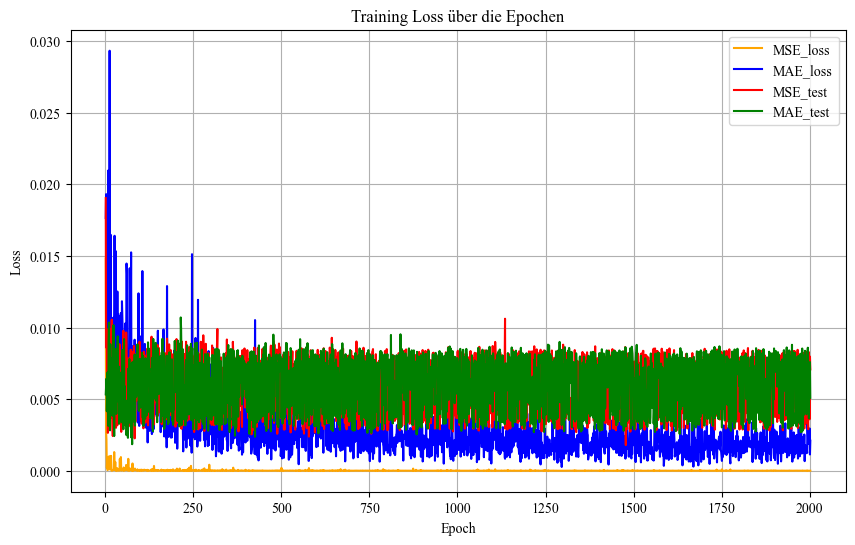

In [51]:
# Erstelle einen Plot für die Losses über die Epoche
plt.figure(figsize=(10, 6))


plt.plot(MSE_loss["Epoch"], MSE_loss["Data Loss"], label="MSE_loss", color="orange")
plt.plot(MAE_loss["Epoch"], MAE_loss["Data Loss"], label="MAE_loss", color="blue")
plt.plot(MSE_loss["Epoch"], MSE_loss["Test Error Loss Function"], label="MSE_test", color="red")
plt.plot(MAE_loss["Epoch"], MAE_loss["Test Error Loss Function MSE"], label="MAE_test", color="green")
    

# Achsentitel & Legende
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss über die Epochen")
plt.legend()
plt.grid(True)

# # Speichern & Anzeigen des Plots
# plt.savefig(f"training_loss_plot_{filename}.png")
plt.show()

In [52]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

In [ ]:
#initialize windoe size for moving average
window_size = 50

# Calculating the moving average
#adding NaN values for the missing timesteps
MSE_loss["Smoothed Total Loss"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MSE_loss["Total Loss"]), window_size)
])

MSE_loss["Smoothed Physical Loss"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MSE_loss["Physical Loss"]), window_size)
])

MSE_loss["Smoothed Data Loss"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MSE_loss["Data Loss"]), window_size)
])

MSE_loss["Smoothed Test Error Mean"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MSE_loss["Test Error Mean"]), window_size)
])

MSE_loss["Smoothed Test Error MSE"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MSE_loss["Test Error Loss Function"]), window_size)
])

# Berechne den gleitenden Durchschnitt für jede Loss-Reihe
MAE_loss["Smoothed Total Loss"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MAE_loss["Total Loss"]), window_size)
])

MAE_loss["Smoothed Physical Loss"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MAE_loss["Physical Loss"]), window_size)
])

MAE_loss["Smoothed Data Loss"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MAE_loss["Data Loss"]), window_size)
])

MAE_loss["Smoothed Test Error Mean"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MAE_loss["Test Error Mean"]), window_size)
])

MAE_loss["Smoothed Test Error MSE"] = np.concatenate([
    np.full(window_size - 1, np.nan),
    moving_average(abs(MAE_loss["Test Error Loss Function MSE"]), window_size)
])


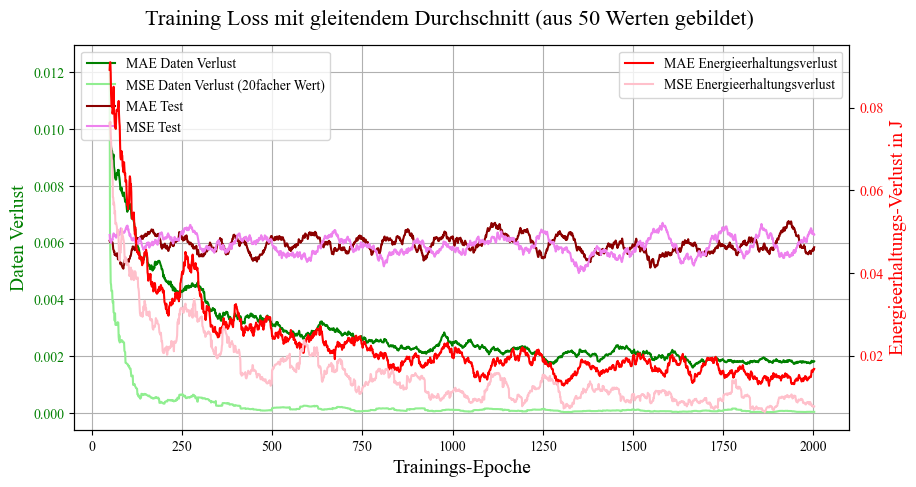

In [ ]:
# create plot
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.family': 'Times New Roman'})

# left y axis for data loss
ax1.set_xlabel("Trainings-Epoche", fontsize = 14)
ax1.set_ylabel("Daten Verlust", fontsize = 14, color="green")
ax1.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Data Loss"], label="MAE Daten Verlust", color="green")
ax1.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Data Loss"]*20, label="MSE Daten Verlust (20facher Wert)", color="lightgreen")
ax1.tick_params(axis="y", labelcolor="green")
ax1.grid(True)

# second axis for physics loss
ax2 = ax1.twinx()
ax2.set_ylabel("Energieerhaltungs-Verlust in J", fontsize = 14, color="red")
# ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Total Loss"], label="MAE Gesamtverlust", color="blue")
# ax2.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Total Loss"], label="MSE Gesamtverlust", color="lightblue")
ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Physical Loss"], label="MAE Energieerhaltungsverlust", color="red")
ax2.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Physical Loss"], label="MSE Energieerhaltungsverlust", color="pink")

ax1.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Test Error MSE"], label="MAE Test", color="darkred")
ax1.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Test Error MSE"], label="MSE Test", color="violet")

ax2.tick_params(axis="y", labelcolor="red")

# titles legends
fig.suptitle(f'Training Loss mit gleitendem Durchschnitt (aus {window_size} Werten gebildet)', fontsize=16, y=0.95)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()



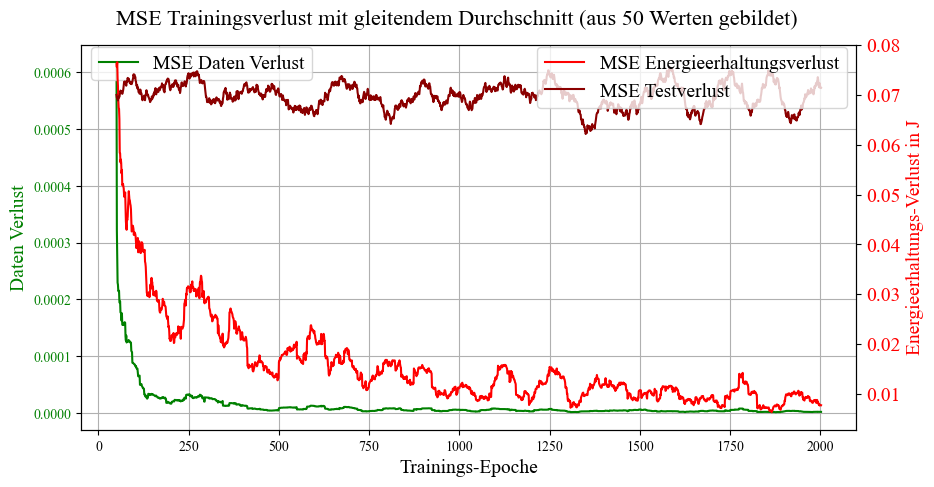

In [ ]:
# Create plot
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})

# left axis for data losss
ax1.set_xlabel("Trainings-Epoche", fontsize = 14)
ax1.set_ylabel("Daten Verlust", fontsize = 14, color="green")
# ax1.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Data Loss"], label="MAE Daten Verlust", color="green")
ax1.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Data Loss"], label="MSE Daten Verlust", color="green")
ax1.tick_params(axis="y", labelcolor="green")
ax1.grid(True)

# second axis fo physical loss
ax2 = ax1.twinx()
ax2.set_ylabel("Energieerhaltungs-Verlust in J", fontsize = 14, color="red")
# ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Total Loss"], label="MAE Gesamtverlust", color="blue")
# ax2.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Total Loss"], label="MSE Gesamtverlust", color="lightblue")
# ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Physical Loss"], label="MAE Energieerhaltungsverlust", color="red")
ax2.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Physical Loss"], label="MSE Energieerhaltungsverlust", color="red")

# ax1.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Test Error MSE"], label="MAE Test", color="darkred")
ax2.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Test Error Mean"], label="MSE Testverlust", color="darkred")

ax2.tick_params(axis="y", labelcolor="red")

# title legend
fig.suptitle(f'MSE Trainingsverlust mit gleitendem Durchschnitt (aus {window_size} Werten gebildet)', fontsize=16, y=0.95)
ax1.legend(loc="upper left", bbox_to_anchor=(0.0, 1.02))
ax2.legend(loc="upper right", bbox_to_anchor=(1.0, 1.02))


plt.show()

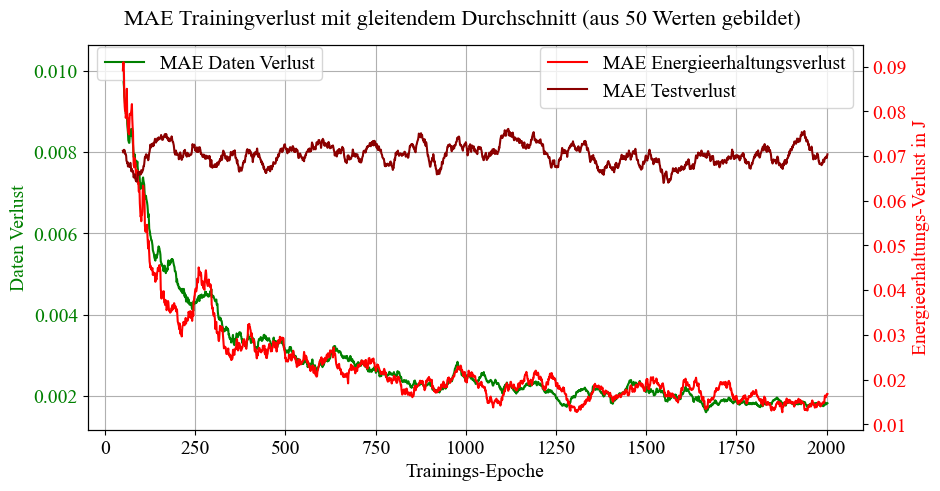

In [ ]:
# Create plot
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})

# left y axis for the data
ax1.set_xlabel("Trainings-Epoche", fontsize = 14)
ax1.set_ylabel("Daten Verlust", fontsize = 14, color="green")
ax1.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Data Loss"], label="MAE Daten Verlust", color="green")
ax1.tick_params(axis="y", labelcolor="green")
ax1.grid(True)

# second axis for physical loss
ax2 = ax1.twinx()
ax2.set_ylabel("Energieerhaltungs-Verlust in J", fontsize = 14, color="red")
# ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Total Loss"], label="MAE Gesamtverlust", color="blue")
# ax2.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Total Loss"], label="MSE Gesamtverlust", color="lightblue")
ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Physical Loss"], label="MAE Energieerhaltungsverlust", color="red")

ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Test Error Mean"], label="MAE Testverlust", color="darkred")

ax2.tick_params(axis="y", labelcolor="red")

# Title legend
fig.suptitle(f'MAE Trainingverlust mit gleitendem Durchschnitt (aus {window_size} Werten gebildet)', fontsize=16, y=0.95)
ax1.legend(loc="upper left", bbox_to_anchor=(0.0, 1.02))  # Legende von ax1 nach oben verschieben
ax2.legend(loc="upper right", bbox_to_anchor=(1.0, 1.02)) # Legende von ax2 nach oben verschieben

plt.show()

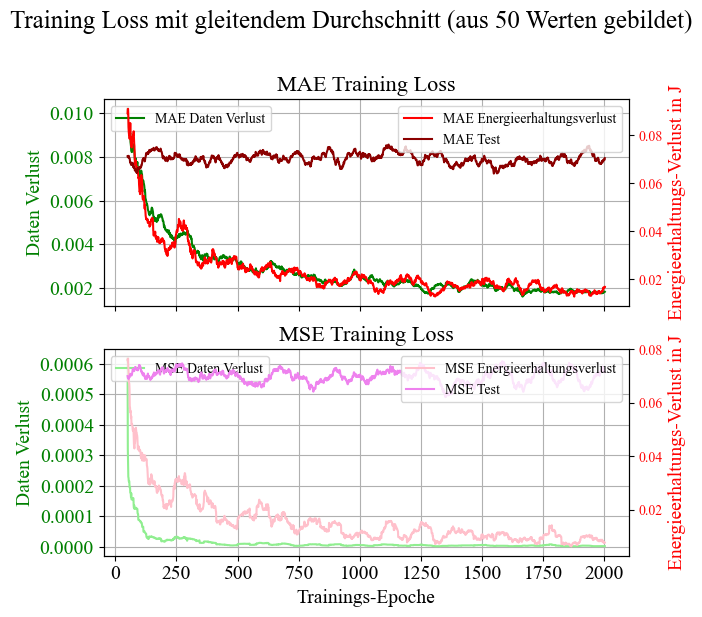

In [ ]:
# create subplots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.family': 'Times New Roman'})

#Mae Plot
# ax1.set_xlabel("Trainings-Epoche", fontsize=14)
ax1.set_ylabel("Daten Verlust", fontsize=14, color="green")
ax1.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Data Loss"], label="MAE Daten Verlust", color="green")
ax1.tick_params(axis="y", labelcolor="green")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel("Energieerhaltungs-Verlust in J", fontsize=14, color="red")
ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Physical Loss"], label="MAE Energieerhaltungsverlust", color="red")
ax2.plot(MAE_loss["Epoch"], MAE_loss["Smoothed Test Error Mean"], label="MAE Test", color="darkred")
ax2.tick_params(axis="y", labelcolor="red")

ax1.set_title("MAE Training Loss", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

#MSE plot
ax3.set_xlabel("Trainings-Epoche", fontsize=14)
ax3.set_ylabel("Daten Verlust", fontsize=14, color="green")
ax3.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Data Loss"], label="MSE Daten Verlust", color="lightgreen")
ax3.tick_params(axis="y", labelcolor="green")
ax3.grid(True)

ax4 = ax3.twinx()
ax4.set_ylabel("Energieerhaltungs-Verlust in J", fontsize=14, color="red")
ax4.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Physical Loss"], label="MSE Energieerhaltungsverlust", color="pink")
ax4.plot(MSE_loss["Epoch"], MSE_loss["Smoothed Test Error Mean"], label="MSE Test", color="violet")
ax4.tick_params(axis="y", labelcolor="red")

ax3.set_title("MSE Training Loss", fontsize=16)
ax3.legend(loc="upper left")
ax4.legend(loc="upper right")

# Title fo subplot
fig.suptitle(f'Training Loss mit gleitendem Durchschnitt (aus {window_size} Werten gebildet)', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()


Evaluating the tested model

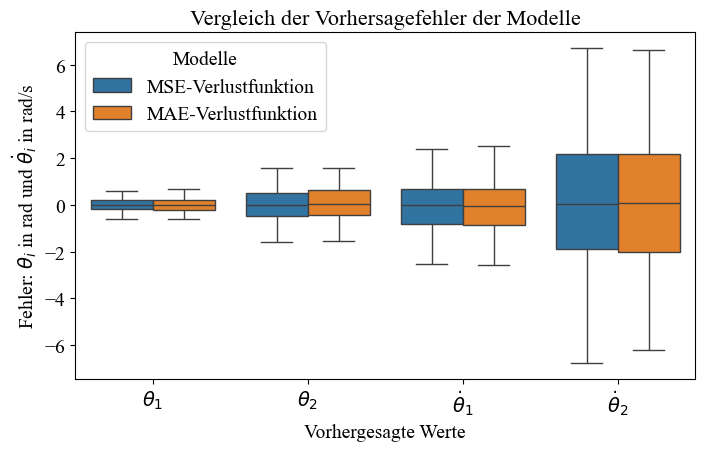

In [ ]:
# Error Calculation of each model
# absolute error
mse_errors = {
    'theta1': MSE_test['theta1_actual'] - MSE_test['theta1_predicted'],
    'theta2': MSE_test['theta2_actual'] - MSE_test['theta2_predicted'],
    'omega1': MSE_test['omega1_actual'] - MSE_test['omega1_predicted'],
    'omega2': MSE_test['omega2_actual'] - MSE_test['omega2_predicted'],
}

percent_mse_errors = {
    'theta1': abs(abs(MSE_test['theta1_actual']) - abs(MSE_test['theta1_predicted'])) / MSE_test['theta1_actual'] * 100,
    'theta2': abs(abs(MSE_test['theta2_actual']) - abs(MSE_test['theta2_predicted'])) / MSE_test['theta2_actual'] * 100,
    'omega1': abs(abs(MSE_test['omega1_actual']) - abs(MSE_test['omega1_predicted'])) / MSE_test['omega1_actual'] * 100,
    'omega2': abs(abs(MSE_test['omega2_actual']) - abs(MSE_test['omega2_predicted'])) / MSE_test['omega2_actual'] * 100,
}

mae_errors = {
    'theta1': MAE_test['theta1_actual'] - MAE_test['theta1_predicted'],
    'theta2': MAE_test['theta2_actual'] - MAE_test['theta2_predicted'],
    'omega1': MAE_test['omega1_actual'] - MAE_test['omega1_predicted'],
    'omega2': MAE_test['omega2_actual'] - MAE_test['omega2_predicted'],
}

percent_mae_errors = {
    'theta1': abs(abs(MAE_test['theta1_actual']) - abs(MAE_test['theta1_predicted'])) / MAE_test['theta1_actual'] * 100,
    'theta2': abs(abs(MAE_test['theta2_actual']) - abs(MAE_test['theta2_predicted'])) / MAE_test['theta2_actual'] * 100,
    'omega1': abs(abs(MAE_test['omega1_actual']) - abs(MAE_test['omega1_predicted'])) / MAE_test['omega1_actual'] * 100,
    'omega2': abs(abs(MAE_test['omega2_actual']) - abs(MAE_test['omega2_predicted'])) / MAE_test['omega2_actual'] * 100,
}

# DataFrames erstellen
mse_errors_df = pd.DataFrame(mse_errors)
percent_mse_errors_df = pd.DataFrame(percent_mse_errors)
mae_errors_df = pd.DataFrame(mae_errors)
percent_mae_errors_df = pd.DataFrame(percent_mae_errors)

# Den durchschnittlichen Fehler in jedem Schritt aus theta1, theta2, omega1 und omega2 berechnen
time_steps = MSE_test[['time']]
mse_errors_absolute_values_combined = mse_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].abs().mean(axis=1)
percent_mse_errors_values_combined = percent_mse_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].mean(axis=1)
mse_errors_values_combined = mse_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].mean(axis=1)

mae_errors_absolute_values_combined = mae_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].abs().mean(axis=1)
percent_mae_errors_values_combined = percent_mae_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].mean(axis=1)
mae_errors_values_combined = mae_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].mean(axis=1)

# Umstrukturieren der Fehlerdaten in "long format"
error_data = pd.DataFrame({
    'Modelle': ['MSE-Verlustfunktion'] * len(mse_errors['theta1']) + ['MAE-Verlustfunktion'] * len(mae_errors['theta1']),
    'theta1_error': list(mse_errors['theta1']) + list(mae_errors['theta1']),
    'theta2_error': list(mse_errors['theta2']) + list(mae_errors['theta2']),
    'theta1dot_error': list(mse_errors['omega1']) + list(mae_errors['omega1']),
    'theta2dot_error': list(mse_errors['omega2']) + list(mae_errors['omega2']),
})

error_data = error_data.rename(columns={
    'theta1_error': r'$\theta_1$',
    'theta2_error': r'$\theta_2$',
    'theta1dot_error': r'$\dot{\theta}_1$',
    'theta2dot_error': r'$\dot{\theta}_2$'
})

# Umstrukturieren auf lange Form (melt)
error_data_melted = pd.melt(error_data, id_vars=['Modelle'], value_vars=[r'$\theta_1$', r'$\theta_2$', r'$\dot{\theta}_1$', r'$\dot{\theta}_2$'],
                            var_name='Vorhergesagte Werte', value_name='Error')

# Boxplot erstellen
plt.figure(figsize=(8, 4.5))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})
sns.boxplot(x='Vorhergesagte Werte', y='Error', hue='Modelle', data=error_data_melted)
plt.title('Vergleich der Vorhersagefehler der Modelle', fontsize=16)
plt.ylabel(r'Fehler: $\theta_i$ in rad und $\dot{\theta}_i$ in rad/s', fontsize=14)
plt.show()

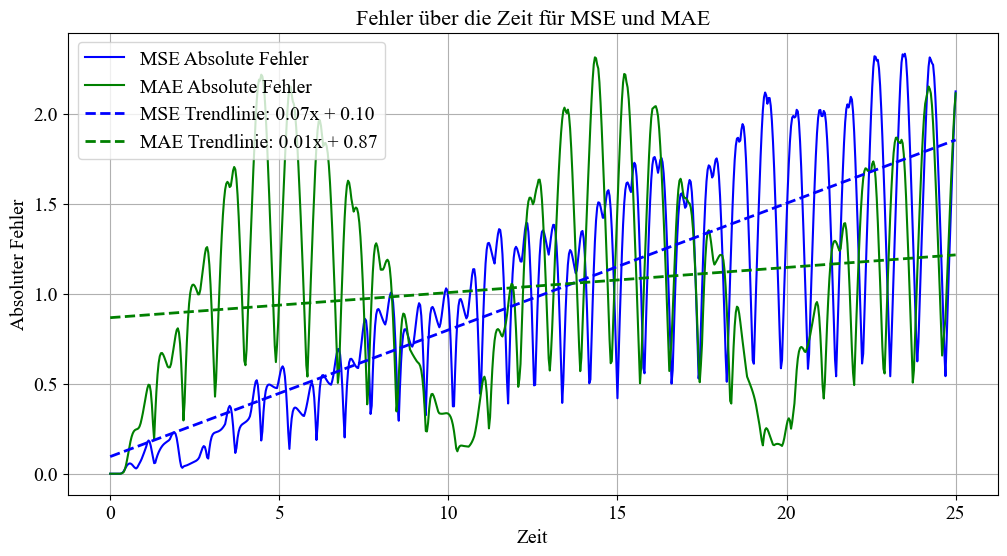

In [59]:
# Zeitachse aus den Daten extrahieren
time_steps = MSE_test['time']

# Absolute Fehler über die Zeit berechnen
mse_errors_absolute_values_combined = mse_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].abs().mean(axis=1)
mae_errors_absolute_values_combined = mae_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].abs().mean(axis=1)

# Plot der Fehler über die Zeit
plt.figure(figsize=(12, 6))

# MSE Fehler (absolute Fehler)
plt.plot(time_steps, mse_errors_absolute_values_combined, label='MSE Absolute Fehler', color='blue')

# MAE Fehler (absolute Fehler)
plt.plot(time_steps, mae_errors_absolute_values_combined, label='MAE Absolute Fehler', color='green')

# Trendlinien hinzufügen
time_steps = np.array(time_steps).flatten()

# Trendlinie für MSE
z_mse = np.polyfit(time_steps, mse_errors_absolute_values_combined, 1)
p_mse = np.poly1d(z_mse)
plt.plot(time_steps, p_mse(time_steps), color='blue', linestyle='--', linewidth=2, label=f'MSE Trendlinie: {z_mse[0]:.2f}x + {z_mse[1]:.2f}')

# Trendlinie für MAE
z_mae = np.polyfit(time_steps, mae_errors_absolute_values_combined, 1)
p_mae = np.poly1d(z_mae)
plt.plot(time_steps, p_mae(time_steps), color='green', linestyle='--', linewidth=2, label=f'MAE Trendlinie: {z_mae[0]:.2f}x + {z_mae[1]:.2f}')

# Plot anpassen
plt.title('Fehler über die Zeit für MSE und MAE', fontsize=16)
plt.xlabel('Zeit', fontsize=14)
plt.ylabel('Absoluter Fehler', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

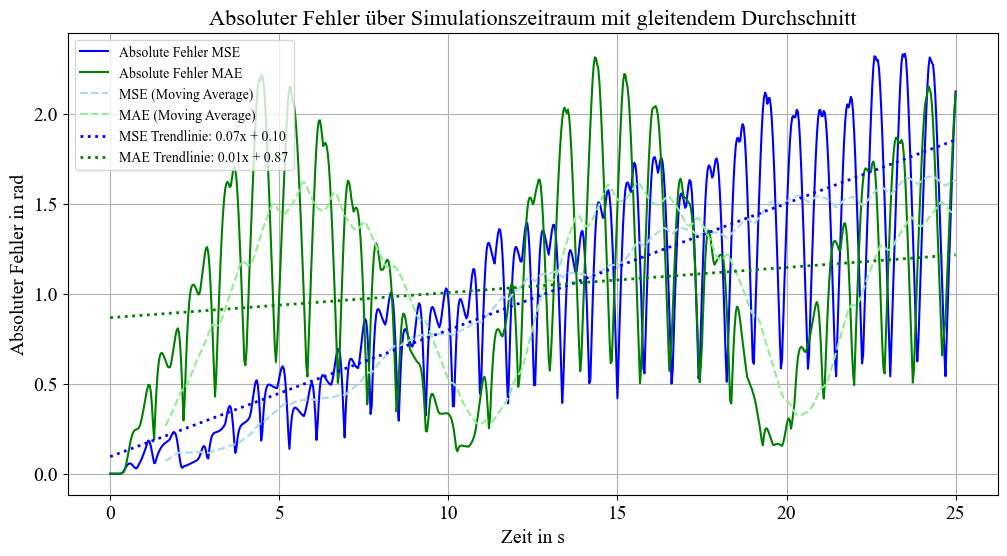

In [60]:
# Funktion für den gleitenden Durchschnitt
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Zeitachse aus den Daten extrahieren
time_steps = MSE_test['time']

# Absolute Fehler über die Zeit berechnen
mse_errors_absolute_values_combined = mse_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].abs().mean(axis=1)
mae_errors_absolute_values_combined = mae_errors_df[['theta1', 'theta2', 'omega1', 'omega2']].abs().mean(axis=1)

# Plot der Fehler mit gleitendem Durchschnitt
plt.figure(figsize=(12, 6))
plt.title('Absoluter Fehler über Simulationszeitraum mit gleitendem Durchschnitt', fontsize=16)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.family': 'Times New Roman'})

# Plotting the actual data
plt.plot(time_steps, mse_errors_absolute_values_combined, label='Absolute Fehler MSE', color='blue')
plt.plot(time_steps, mae_errors_absolute_values_combined, label='Absolute Fehler MAE', color='green')

# Berechne den gleitenden Durchschnitt für jede Fehlerreihe
window_size = 50  # Fenstergröße für den gleitenden Durchschnitt
mse_smoothed = moving_average(mse_errors_absolute_values_combined, window_size)
mae_smoothed = moving_average(mae_errors_absolute_values_combined, window_size)

# Anpassung der Zeitstempel, um die reduzierte Länge nach dem gleitenden Durchschnitt widerzuspiegeln
time_steps_smoothed = time_steps[window_size - 1:]

# Plotting the moving average
plt.plot(time_steps_smoothed, mse_smoothed, label='MSE (Moving Average)', color='lightblue', linestyle='--')
plt.plot(time_steps_smoothed, mae_smoothed, label='MAE (Moving Average)', color='lightgreen', linestyle='--')

# Trendlinien hinzufügen
time_steps = np.array(time_steps).flatten()

# Trendlinie für MSE
z_mse = np.polyfit(time_steps, mse_errors_absolute_values_combined, 1)
p_mse = np.poly1d(z_mse)
plt.plot(time_steps, p_mse(time_steps), color='blue', linestyle=':', linewidth=2, label=f'MSE Trendlinie: {z_mse[0]:.2f}x + {z_mse[1]:.2f}')

# Trendlinie für MAE
z_mae = np.polyfit(time_steps, mae_errors_absolute_values_combined, 1)
p_mae = np.poly1d(z_mae)
plt.plot(time_steps, p_mae(time_steps), color='green', linestyle=':', linewidth=2, label=f'MAE Trendlinie: {z_mae[0]:.2f}x + {z_mae[1]:.2f}')

# Plot anpassen
plt.xlabel('Zeit in s', fontsize=14)
plt.ylabel('Absoluter Fehler in rad', fontsize=14)
plt.legend()  # Legende aktualisieren, um Trendlinien einzuschließen
plt.grid(True)
plt.show()

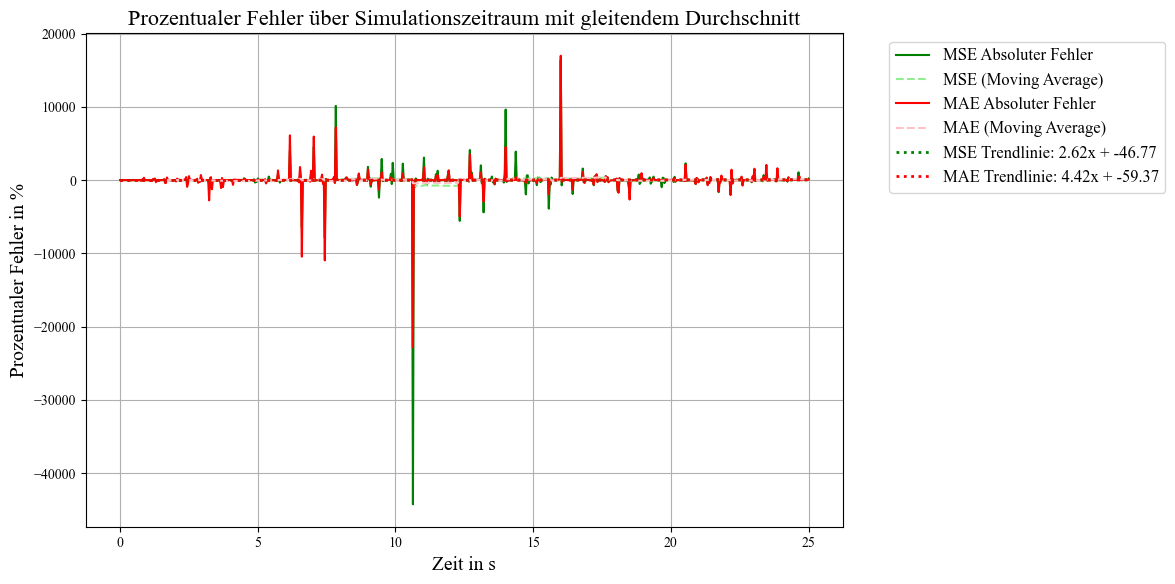

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Funktion für den gleitenden Durchschnitt
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Plot der Fehler mit gleitendem Durchschnitt
plt.figure(figsize=(12, 6))
plt.title('Prozentualer Fehler über Simulationszeitraum mit gleitendem Durchschnitt', fontsize=16)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'Times New Roman'})

# Daten für die Fehler und ihre Beschriftungen
error_data = {
    'MSE': (percent_mse_errors_values_combined, 'green', 'lightgreen'),
    'MAE': (percent_mae_errors_values_combined, 'red', 'pink'),
}

# Fenstergröße für den gleitenden Durchschnitt
window_size = 50

# Plot der tatsächlichen Fehler und der geglätteten Kurven
for label, (errors, color, smooth_color) in error_data.items():
    # Plot der tatsächlichen Fehler
    plt.plot(time_steps, errors, label=f'{label} Absoluter Fehler', color=color)

    # Berechne den gleitenden Durchschnitt
    smoothed_errors = moving_average(errors, window_size)
    time_steps_smoothed = time_steps[window_size - 1:]  # Zeitachse anpassen

    # Plot der geglätteten Kurve
    plt.plot(time_steps_smoothed, smoothed_errors, label=f'{label} (Moving Average)', color=smooth_color, linestyle='--')

# Trendlinien hinzufügen
time_steps_flat = np.array(time_steps).flatten()

for label, (errors, color, _) in error_data.items():
    # Berechne die Trendlinie
    z = np.polyfit(time_steps_flat, errors, 1)
    p = np.poly1d(z)
    
    # Plot der Trendlinie
    plt.plot(time_steps_flat, p(time_steps_flat), color=color, linestyle=':', linewidth=2, 
             label=f'{label} Trendlinie: {z[0]:.2f}x + {z[1]:.2f}')

# Plot anpassen
plt.xlabel('Zeit in s', fontsize=14)
plt.ylabel('Prozentualer Fehler in %', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legende außerhalb des Plots platzieren
plt.grid(True)
plt.tight_layout()  # Layout anpassen, um Überlappungen zu vermeiden
plt.show()


In [62]:
def get_cartesian_coordinates(data, L1=1.4, L2=1):
    """Berechnet die kartesischen Koordinaten der Massen M1 und M2 basierend auf den Winkeln."""
    u0 = data[:, 0]  # theta_1 
    u1 = data[:,1]     # omega 1
    u2 = data[:,2]     # theta_2 
    u3 = data[:,3]     # omega_2 

    M1 = np.array([L1 * np.sin(u0), -L1 * np.cos(u0)])  # Position der ersten Masse
    M2 = M1 + np.array([L2 * np.sin(u2), -L2 * np.cos(u2)])  # Position der zweiten Masse
    Mp1 = np.array([L1*np.sin(u1), -L1*np.cos(u1)])
    Mp2 = Mp1 + np.array([L2*np.sin(u3), -L2*np.cos(u3)])
    return M1, M2

def getMountTriangleCoord(x, TriAngleHeight=0.3, TriAngleWidth=0.3):
    """Gibt die Koordinaten des Montage-Dreiecks zurück."""
    return np.array([[0., -TriAngleWidth / 2, TriAngleWidth / 2],
                     [0., TriAngleHeight, TriAngleHeight]])


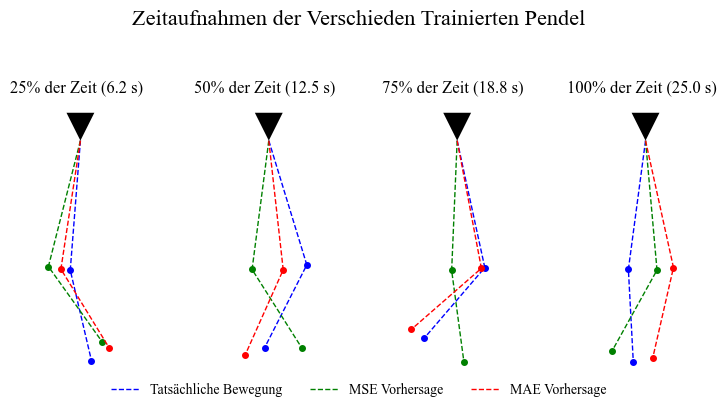

In [63]:
# Annahme: Deine DataFrames enthalten Zeitreihen-Daten mit mehreren Zeitschritten
time = MSE_test['time'].to_numpy()
ground_truth = MSE_test[['theta1_actual', 'omega1_actual', 'theta2_actual', 'omega2_actual']].to_numpy()
mse_pred = MSE_test[['theta1_predicted', 'omega1_predicted', 'theta2_predicted', 'omega2_predicted']].to_numpy()
mae_pred = MAE_test[['theta1_predicted', 'omega1_predicted', 'theta2_predicted', 'omega2_predicted']].to_numpy()

# Bestimme die Indizes für 25%, 50%, 75%, 100% der Daten
num_steps = ground_truth.shape[0]  # Anzahl der Zeitschritte
selected_indices = [int(num_steps * 0.25), int(num_steps * 0.50), int(num_steps * 0.75), int(num_steps - 1)]
time_25, time_50, time_75, time_100 = time[selected_indices]

# Liste der Modelle für den Vergleich
comparison_models = [ground_truth, mse_pred, mae_pred]

# Erstelle Subplots
fig, axes = plt.subplots(1, 4, figsize=(8, 4), sharex=True, sharey=True)
fig.suptitle("Zeitaufnahmen der Verschieden Trainierten Pendel", fontsize=16, y=1.05)

plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.family': 'Times New Roman'})

# Beschriftungen und Titel
model_labels = ["Tatsächliche Bewegung", "MSE Vorhersage", "MAE Vorhersage"]
titles = [
    f"25% der Zeit ({time_25:.1f} s)",
    f"50% der Zeit ({time_50:.1f} s)",
    f"75% der Zeit ({time_75:.1f} s)",
    f"100% der Zeit ({time_100:.1f} s)"
]

# Farben für verschiedene Modelle
colors = ['b', 'g', 'r']

# Plot für jeden ausgewählten Zeitpunkt
for i, idx in enumerate(selected_indices):
    ax = axes[i]

    # Mounting Triangle in schwarz
    mountTriAngle_Coord = getMountTriangleCoord(0)
    ax.fill(mountTriAngle_Coord[0], mountTriAngle_Coord[1], 'k')  # 'k' für schwarz

    for j, element in enumerate(comparison_models):
        M1, M2 = get_cartesian_coordinates(element)

        # M1 -> M2 (zweite Stange)
        ax.plot([0, M1[0, idx], M2[0, idx]], [0, M1[1, idx], M2[1, idx]], colors[j] + '--', linewidth=1, label=f"{model_labels[j]}")

        # Gelenke plotten
        ax.plot(M1[0, idx], M1[1, idx], colors[j] + 'o', markersize=4)  # Joint 1
        ax.plot(M2[0, idx], M2[1, idx], colors[j] + 'o', markersize=4)  # Joint 2

    ax.set_aspect('equal')
    ax.set_title(titles[i])
    ax.set_axis_off()
    ax.set_xticks([])  # Entfernt die Ticks auf der x-Achse
    ax.set_yticks([])  # Entfernt die Ticks auf der y-Achse
    ax.set_xlabel('')  # Entfernt die Beschriftung der x-Achse
    ax.set_ylabel('')  # Entfernt die Beschriftung der y-Achse

# Legende außerhalb der einzelnen Plots platzieren
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=len(model_labels), fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Anpassung für die Legende außerhalb
plt.show()